##IMPORT MODULES


In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource
import sklearn
from sklearn.linear_model import LinearRegression
import os

In [3]:
df = pd.read_csv('PET_PRI_GND_DCUS_NUS_W.csv')
df.shape

(1361, 14)

In [5]:
df.head(3)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100


In [7]:
filter = df['Date'] != '01/25/2021'
df_today = df.drop(df[filter].index,inplace = False)
df_today

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.9,3.191,2.716


DATA DIESEL


In [11]:
df_diesel = df.drop(columns=['A1',
       'A2',
       'A3',
       'R1',
       'R2',
       'R3',
       'M1',
       'M2',
       'M3',
       'P1',
       'P2',
       'P3'])
df_diesel.rename(columns={'D1':'Diesel'},inplace = True)
df_diesel.tail(3)

,Date,Diesel
1358,01/11/2021,2.670
1359,01/18/2021,2.696
1360,01/25/2021,2.716


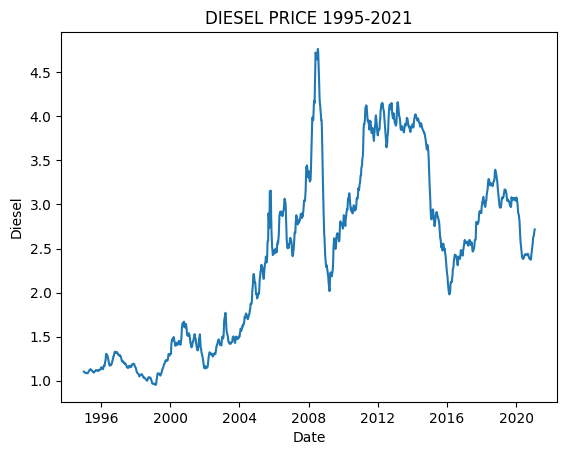

In [17]:
df_diesel['Date']= pd.to_datetime(df_diesel['Date'])
plt.plot(df_diesel['Date'],df_diesel['Diesel'])
plt.xlabel('Date')
plt.ylabel('Diesel')
plt.gca().set_title('DIESEL PRICE 1995-2021')
plt.show()

Linear Regression

In [19]:
df_diesel['Year'] = 0
df_diesel['Year'] = df_diesel['Date'].dt.strftime('%Y').astype(int)

df_diesel.drop(columns=['Date'])
df_diesel.head(3)

,Date,Diesel,Year
0,1995-01-02,1.104,1995
1,1995-01-09,1.102,1995
2,1995-01-16,1.100,1995


Trung bình tiền dầu mỗi năm

In [21]:
df_year =  df_diesel[['Year','Diesel']].groupby(['Year'],as_index = False).mean()

df_year.tail(10)

,Year,Diesel
17,2012,3.967736
18,2013,3.921731
19,2014,3.824635
20,2015,2.706635
21,2016,2.303942
22,2017,2.650038
23,2018,3.177642
24,2019,3.055827
25,2020,2.550808
26,2021,2.680500


In [22]:
df_year['Diesel'] = np.log(df_year['Diesel'])

$1.4170382971254725 USD


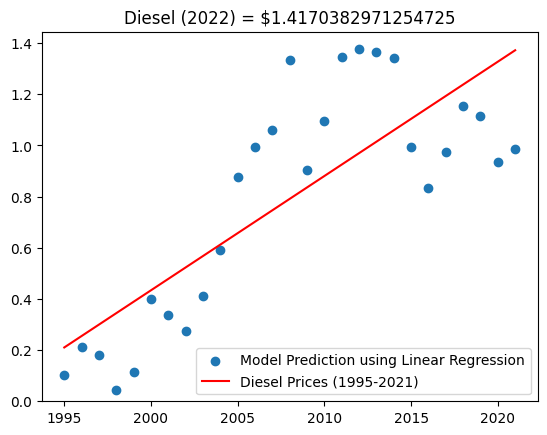

In [24]:
X = df_year['Year']
y = df_year['Diesel']
slope,intercept,r,p,std_err = stats.linregress(X,y)
def modelPrediction(x):
    return slope * x + intercept
model = list(map(modelPrediction,X))
x_pred = 2022
y_pred = modelPrediction(x_pred)
round(y_pred,2)
print('${} USD'.format(y_pred))
title = 'Diesel (2022) = ${}'.format(y_pred)
plt.title(title)
plt.scatter(X,y)
plt.plot(X,model,color = 'red')
plt.ylim(ymin = 0)
plt.legend(['Model Prediction using Linear Regression', 'Diesel Prices (1995-2021)'])
plt.show()

Diesel
score = 63.0
coef = [0.04468824]
intercept = -88.94257818186611
SciKit-Learn


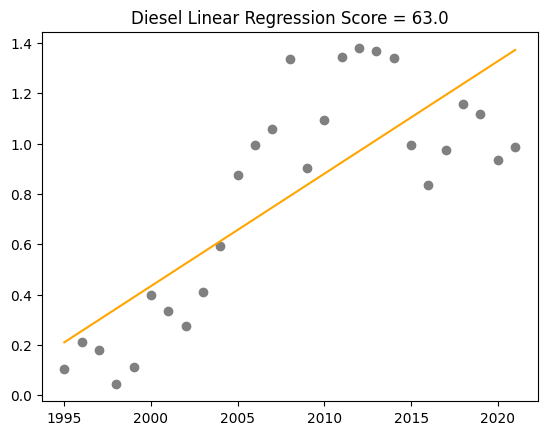

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression
print('Diesel')
x = df_year[['Year']].values
y = df_year['Diesel'].values
regr = sklearn.linear_model.LinearRegression()
model = regr.fit(x,y) # SciKit-Learn
score = regr.score(x, y)
score = round(score*100,2)
title = f"Diesel Linear Regression Score = {score}"
plt.title(title)
print('score = {}'.format(score))
coef = regr.coef_
print('coef = {}'.format(coef)) # 1.0
intercept = regr.intercept_
print('intercept = {}'.format(intercept)) # 3.0000...
y_pred = model.predict(x)
print('SciKit-Learn')
plt.scatter(x, y, color='gray') # sklearn
plt.plot(x, y_pred, color='orange') # model
# plt.ylim(0) # start at zero
plt.show()